Este python notebook aconpaña al markdown de R entregable en la práctica 1

Primero, realiza ejericios de clusterización que acompañan al descriptivo de los datos.
En el markdown de R se intentó clusterizar en función del zipcode para conocer la importancia de la ubicación de una residencia, pero no se pudeo ejecutar.
En segundo lugar, se realiza un sencillo ejercicio de k-nearest neighbour. Se compara el MSe con el obtenido en el modelo de Ridge

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [16]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

In [3]:
house = pd.read_csv('house_train.csv', sep = ',') # importación del fichero as pd

In [4]:
del house['date']

In [5]:
house_zip=house[["price", "zipcode"]]

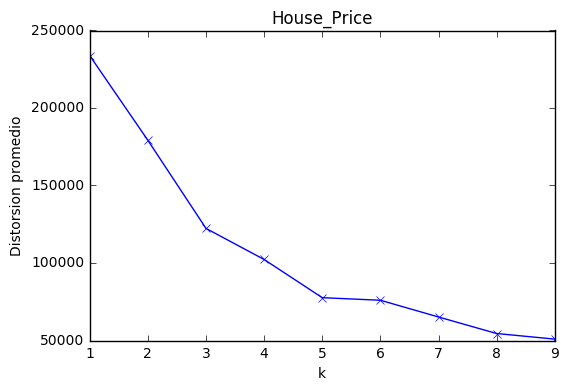

In [6]:
from scipy.spatial.distance import cdist

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

plot_distorsion(house_zip, 'House_Price')

El número óptimo de clusters, teniendo en cuanta tan solo zipcode y price es 5-6.

El número óptimo de clsuster, teniendo en cuanta tan solo zipcode y price es 5-6.

In [7]:
house_zip_price=house[["price", "zipcode", "price"]]

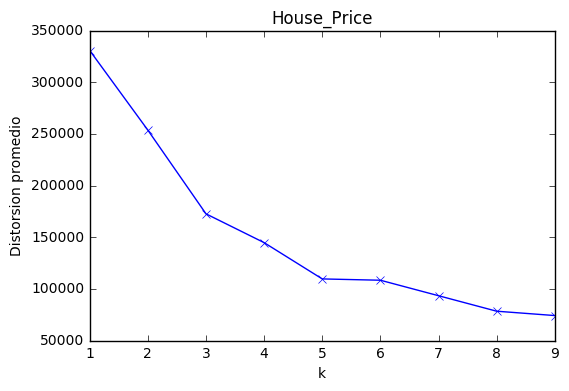

In [8]:
from scipy.spatial.distance import cdist

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

plot_distorsion(house_zip_price, 'House_Price')

El número óptimo de clusters, teniendo en cuenta tan solo zipcode y price es también de 5-6.

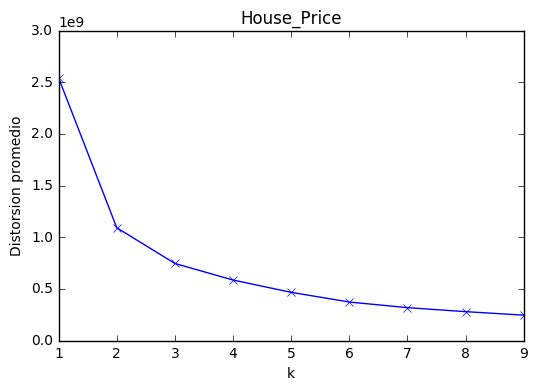

In [9]:
from scipy.spatial.distance import cdist

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

plot_distorsion(house, 'House_Price')

El número óptimo de cluster teniendo en cuenta todo el dataframe es de 4-5.

In [10]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(house, train_size = 0.7, random_state = 10)

In [12]:
input_feature = train_data.columns.values.tolist() # list of column name
input_feature.remove('price')

Aplicación k-nearest neighbour

In [17]:
train_X = train_data.as_matrix(columns = input_feature)
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X = test_data.as_matrix(columns = [input_feature])
test_X_scaled = scaler.transform(test_X)

knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance') # initialize the model
knn.fit(train_X_scaled, train_data.as_matrix(columns = ['price'])) # fit the train data
print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']), 
                              knn.predict(test_X_scaled))**0.5) # predict price and test error

test error (RMSE) is: 173271.40539


El RMSE es prácticamente es ligeramente superior la obtenido en la regresión de Ridge 167846.